Error on line 23 :   multiple choice response was left blank.
The mean of the Self Reported Linear Scale of Knowledge: 2.2083333333333335


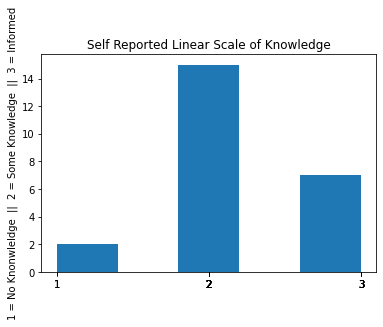

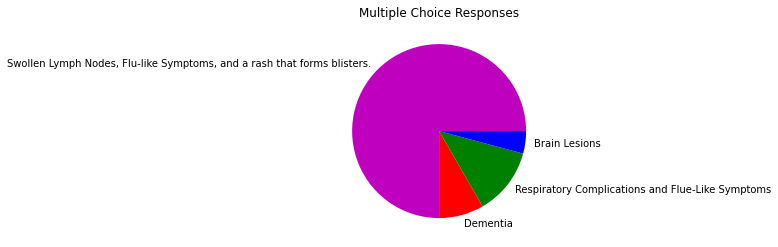

In [17]:
#Nathaniel Brown
#November 9, 2022
#CSC 201 Fall 22'
#Assignment 10: Programming with Data Using NumPy & Dictionaries
#Title: Survey Analysis Google Forms
###
#Description: This program will read and clean the google form survey responses, checking for
#data-type, range, and mandatory constraints. These checks will focus on the age of the respondent,
#rating for a linear scale question as a histogram plot, an count the number of times each valid choice
#was chosen for multiple choice questions. It will then plot ratings for linear scale questions as 
#a histogram and plot hte counts for each choice question as a pie chart to recreate visualizations
#provided by the google forms survey.
###
#Solution: This program was designed by starting with designing functions to check the validity of three 
#separate fields; the age of the participants (to ensure that only data from valid age participants was being 
#               collected. i.e. 0-150), then functions to check both the multiple 
#choice validity and the linear scale validity. The multiple choice was checked to ensure that response was not 
#blank, as well as whether or not the data of the answer was one of the four predefined answers. Likewise, the 
#linear scale check was designed to ensure that the response was not blank, and that the response given was a 
#valid metric of 1-3. Next a function to read and clean our imported CSV file was established and within that 
#function we call the aforementioned validity checks; in order to ensure the data is accurate. Then the newly 
#clean data is pushed from the  CSV read function back to our main function where it is defined in a series of 
#lists and answer variables. That data is then pushed into two separate functions to draw a histogram, and a pie 
#chart respectively. Finally a computation function that runs the mean of a pushed array is defined and called
#within the histogram function in order to output a related mean statistic. As per the requirements.
###
##### IMPORTS and Outer Variables#####
import matplotlib.pyplot as plt     # import sub-library for graphs, charts, plots, etc.
import numpy as np                  # import numpy array for more efficient storage and data operations
import csv
##############################
##### Check Age Function #####
# This function checks if the age contains only digits, OR that the first two characters contain
# only digits. (i.e. 21yrs, becomes 21) AND if the age is between 0 and 150
# arguments - 1 string representing the age of respondent
# return - 1 boolean (i.e. true or false) if the age is valid.
def chk_age(some_age):                                    #def function to check age
    val_age = True                                        #start with a true value
    if some_age.isdigit() or some_age[0:2].isdigit():     #if age is a digit, or first two positions are digits stay true
        if len(some_age) > 2 and some_age[2].isdigit():   #if above, check if length greater than 2 and first two positions are true
            age = int(some_age[0:3])                         #make a variable for the age saved as an integer
        else:
            age = int(some_age[0:2])                      # else, use two position integer
        if age < 0 or age > 150:                          # check if age is outside of reasonable bounds 0-150. 
            val_age = False                               # make false if outside
    else:
        val_age = False                                   #otherwise make false
    return val_age                                        #return validity value for future use.
##############################
##### Check Linear Scale #####
# This function checks if rating contains only digits and if the rating is between the specified
# scale (i.e. 1 to 5, 1 to 10 etc.)
# arguments - 1 string representing the rating given for a linear scale question.
# returns - 1 boolean (i.e. true or false) if the rating is valid.
def chk_linscale(some_lin):                               #def function to check linescale validity
    val_linscale = True                                   #start with true value
    if some_lin.isdigit():                                #if passed parameter is digit
        rating = int(some_lin)                            #define variable with integer of above.
        if rating < 0 or rating > 3:                      #check to see if its within 0-3
            val_linscale = False                          #if not false
    else:
        val_linscale = False                              #anything else, change to false.
    return val_linscale                                   #return validity variable for future use.
##############################
##### Check Multiple Choice #####
# Thsi function checks if the choice for the multiple choice question is not empty and is one of the
# provided choices for the question.
# arguments - 1 string representing the choice given for a multiple choice question
# return - 1 boolean (i.e. either true or false) if the choice is valid.
def chk_mpchoice(some_choice):                           #def function to check multiple choice validitiy
    val_mpchoice = True                                  #start with true
    if (some_choice == "Swollen Lymph Nodes, Flu-like Symptoms, and a rash that forms blisters.") or (some_choice == "Dementia" ) or (some_choice == "Respiratory Complications and Flu-like Symptoms") or (some_choice == "Brain Lesions") :
        val_mpchoice = True                              # if passed argument (some_choice) is one of the 4 options, maintain true.
    else:                                                # otherwise, change to false.
        val_mpchoice = False
    return val_mpchoice                                  #return validity variable for future use.
    
##############################
##### Read CSV #####
# This function opens and reads the survey CSV responses and checks/cleans invalid data entries in
# each row of the file.
# arguments - 1 string representing the name of hte survey responses csv file
# return - at least 1 list containing valid/cleaned responses for your linear rating scale question
#and at least 2 integer variables containing counts for your provided choices in your multiple choice
# questions.
def read_csv(file):                               #def function to read csv file
    lineratings = []                              #establish array for linerattings, and counts for ans 1 - 4
    ans1 = 0
    ans2 = 0
    ans3 = 0
    ans4 = 0
    
    with open(file) as csv_infile:                 #with the file open
        reader = csv.DictReader(csv_infile)        # define variable for csv.dictreader
        for row in reader:                         # for each row in afforementioned variable
            if chk_age(row["What is your age?"]) == False:      #check if row for age triggered false in previous check. Inform what is wrong.
                print("Error on line" , str(reader.line_num) , ":" , row["What is your age?"] , " not integer or out of range.")
            if chk_linscale(row["How familiar are you with the monkeypox outbreak? (2 being, you have just heard of it.)"]) == False:  #check if row for linear triggered false in previous check. Inform what is wrong.
                print("Error on line" , str(reader.line_num) , ":" , row["How familiar are you with the monkeypox outbreak? (2 being, you have just heard of it.)"] , " not integer or out of range. ")
            if chk_mpchoice(row["What are the symptoms of Monkeypox?"]) == False:  #check if row for multiplechoice triggered false in previous check. Inform what is wrong.
                print("Error on line" , str(reader.line_num) , ":" , row["What are the symptoms of Monkeypox?"] , " multiple choice response was left blank.")
            else:                                 #otherwise, add to array or respective count... respectively?
                lineratings.append(int(row["How familiar are you with the monkeypox outbreak? (2 being, you have just heard of it.)"]))
                ans1 += row["What are the symptoms of Monkeypox?"].count("Swollen Lymph Nodes, Flu-like Symptoms, and a rash that forms blisters.")
                ans2 += row["What are the symptoms of Monkeypox?"].count("Dementia")
                ans3 += row["What are the symptoms of Monkeypox?"].count("Respiratory Complications and Flu-like Symptoms")
                ans4 += row["What are the symptoms of Monkeypox?"].count("Brain Lesions")
    return lineratings , ans1 , ans2 , ans3 , ans4               #return newly defined variables that have been cleaned, for future plotting.
            
##############################
##### plot linear rating #####
# this function plots a histogram with the ratings for your linear scale question
# arguments 1 list containing integer ratings to your linear scale question
def plt_linear(some_list):   #def function to plot linear scale using passed list.
    plt.hist(some_list, bins=5)   #plots histogram, with list and 5 bins.
    plt.title("Self Reported Linear Scale of Knowledge")       #plots title for histogram
    plt.ylabel("1 = No Knonwleldge  ||  2 = Some Knowledge  ||  3 = Informed")   #plots labels for scale definitions
    plt.xticks(some_list)       #plots x ticks using the list
    
    compute(some_list)          #run computaion to uncover mean of somelist.
    
    plt.show()                 # plot the chart.
##############################
##### plot counts #####
# This function plots a pie chart based on the counts for each choice in the multiple choice question.
# arguments at least 2 integer variables storing the counts for each choice in your multiple choice question.
def plt_counts(ans1 , ans2 , ans3 , ans4):         #def function to plot counts using ans variables from multiple choice csv_read() and mpcheck.
    counts = [ ans1 , ans2 , ans3 , ans4]          #def the counts as a singular variable array.
    countlabels = ['Swollen Lymph Nodes, Flu-like Symptoms, and a rash that forms blisters.' , 'Dementia' , 'Respiratory Complications and Flue-Like Symptoms' , 'Brain Lesions']
    plt.pie(counts , labels = countlabels , colors = {'b' , 'r' , 'm' , 'g'})    #above provides labels, then plot pie using two new variables. And sets chart colors.
    plt.title('What are the symptoms of Monkeypox?')  #sets plot title
    plt.show()                             #prints the plot
##############################
##### compute #####
# this function computes a data statistic using the numpy module(i.e mean, median, standard deviation)
#with the ratings for your linear scale question
# arguments - 1 list containing ratings to your linear scale questoin
# return - 1 float containing the computed data statistic on the lsit of ratings passed to it
def compute(line_ratings):               #def function to compute line_ratings array from earlier.
    computeline = np.mean(line_ratings)    #establish variable that equals numpy mean of afforementioned passed list.
    print("The mean of the Self Reported Linear Scale of Knowledge:" , computeline)    #print the calculation with words to give reference.
##############################
##### MAIN FUNCTION #####
# This function setups the program and manages call functions defined for specified processing,
# calculations, visualizations and output.
def main():            #defines main function used to execute the entire program.
    masterfile = "brown_survey.csv"              #establishes variable for csv file used throughout the cleaning section of program
    lineratings , ans1 , ans2 , ans3 , ans4 = read_csv(masterfile)     #establishes variables for the cleaned data within the csv file.
    plt_linear(lineratings)          #runs plot linear function using lineratings
    plt_counts(ans1 , ans2 , ans3 , ans4)    #runs plot pie function using the counts
    

main()      # as mentioned above runs the main function, essentially starting the program.
    